# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df = pd.read_csv('data/human_body_temperature.csv')

# 1. Is the distribution of body temperatures normal?

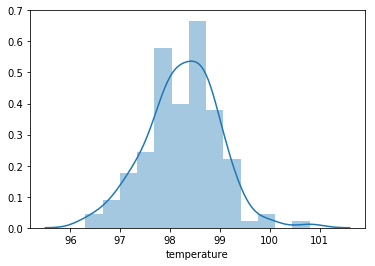

In [38]:
temps = np.array(df.temperature)
#_ = plt.hist(temps, normed=True)

_ = sns.distplot(df.temperature, hist=True)

In [17]:
mean = np.mean(df.temperature)
std = np.std(df.temperature)
min_stat = np.min(df.temperature)
max_stat = np.max(df.temperature)
print(mean, std, min_stat, max_stat)

98.24923076923078 0.7303577789050377 96.3 100.8


We will use scipy.stats.normaltest, to determine if our data is normally distributed. 

Our null hypothesis is our data is normally distributed,
Our alternative hypothesis is that it is not. 

In [43]:
p = stats.mstats.normaltest(temps)
if(p.pvalue < 0.05):
    print("Not normal distribution, p-value of ", p.pvalue)
else:
    print('Fail to prove its not a normal distribution, p-value of ', p.pvalue) 

Fail to prove its not a normal distribution, p-value of  0.2587479863488254


Since our p-value is not less than .05, we fail to reject the null hypothesis, meaning we can assume the recorded temperatures are normally distributed. 

# 2. Is the sample size large? Are the observations independent?

Since our sample size is more than 30, we can assume that the data is safe to use. 

We also are sampling less than 10% of the population, therefor

# 3. Is the true population mean really 98.6 degrees F?    

1. Bootstrap hypothesis test


Our null hypothesis is the true body temperature mean is 98.6 degrees
<br>
Our alternate hypothesis is that the true body temperature mean is not 98.6 degrees

In [47]:
def draw_bs_samples(data, func, size=1):
    replicates = np.empty(size)
    len_data = len(data)
    for i in range(size):
        sample_temps = np.random.choice(data, len_data)
        replicates[i] = func(sample_temps)
        
    return replicates

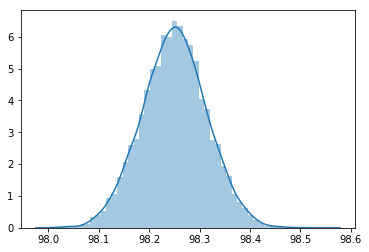

In [49]:
bs_temps = draw_bs_samples(temps, np.mean, 10000)

_ = sns.distplot(bs_temps, hist=True)

In [53]:
bs_mean = np.mean(bs_temps)
percentile = np.percentile(bs_temps, [2.5, 97.5])
percentile

array([98.12382692, 98.37615385])

Frequentist Statistical Testing

I will be using a one sample test


In [ ]:
t_stat = (mean - 98.6) / std 

